# Geopandas - real-life example of inheritance

http://geopandas.org/

In [1]:
import geopandas
from geopandas import GeoDataFrame, GeoSeries
from shapely.geometry import Point
import pandas as pd

%matplotlib inline

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.iloc[39:42]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
39,531640.0,Asia,Cyprus,CYP,22700.0,"POLYGON ((33.97361657078346 35.058506374648, 3..."
40,10211904.0,Europe,Czech Rep.,CZE,265200.0,"POLYGON ((16.96028812019458 48.5969823268506, ..."
41,82329758.0,Europe,Germany,DEU,2918000.0,"POLYGON ((9.921906365609232 54.98310415304803,..."


In [3]:
places = ["My Home", "PyCon"]
coords = ((14.415, 50.131), (18.281, 49.82))
geometry = GeoSeries([Point(p) for p in coords])
geo_df = GeoDataFrame({
    "places": places
})
geo_df.geometry = geometry
geo_df

,places,geometry
0,My Home,POINT (14.415 50.131)
1,PyCon,POINT (18.281 49.82)


In [4]:
geo_df.distance(geo_df.geometry.iloc[0])

0    0.000000
1    3.878489
dtype: float64

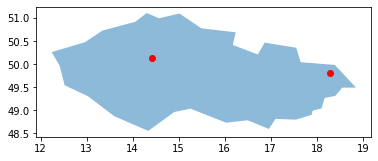

In [5]:
ax = world[world.name.str.contains("Czech")].plot(lw=2, alpha=.5)
geo_df.plot(ax=ax, c="red");
ax.figure.savefig("cz-map.svg")